In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 200)
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
plt.style.use('fivethirtyeight')
import matplotlib_inline
from pathlib import Path
# get higher quality plots
matplotlib_inline.backend_inline.set_matplotlib_formats('retina')
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1.5
import seaborn as sns
import datetime

In [2]:
%load_ext autoreload
%autoreload 1
%aimport src.utils.processes

# Questions
## Metadata
- `Date`: Is it a holiday? Do holidays have a greater attendance?
- `DayofWeek`: Is there greater attendance on weekends? Any particular day?
- `DayNight`: Do night games have greater attendance? Is there a best time? Could traffic be affecting this?
- `VistingTeamScore` and `HomeTeamScore`: Would average margin of victory/loss affect attendance?
- `VisitingTeamGameNumber`: Is early in the season, middle, or end have greater attendance?
- `HomeTeamGameNumber`: Is early in the season, middle, or end have greater attendance? Before or after all-star break?
- `NumberofOuts` and `LengthofGame`: How does length of game (min) and length of game in outs affect attendance? Do shorter games have longer attendance?
- `Park ID` does average temperature/climate of park affect attendance?

## Derived Features
- `Visiting team ranking` (find feature) effect on attendance?
- `Home team ranking` (find feature) effect on attendance?
- `VisitingTeam_StartingPitcher_Name` is all-star?
- `HomeTeam_StartingPitcher_Name` is all-star?
- How does number of all-stars affect attendance?
- How does average age of starting lineup affect attendance?
    - Try using `HomeTeam_Player_#_Name` and `VisitingTeam_Player_#_Name`

## Game Stats
- Visiting team offensive statistics?
- Visiting team pitching statistics?
- Visiting team defensive statistics?
- Home team offensive statistics?
- Home team pitching statistics?
- Home team defensive statistics?

In [3]:
DATA_PATH = Path('../../data')

In [4]:
df = pd.read_parquet(DATA_PATH.joinpath('processed', 'game_logs_standings.parquet'))

In [5]:
df.shape

(52052, 165)

# Converting Categorical Variables to Meaningful Quantitative

## Feature Engineering

In [7]:
# collect wins and losses for home team
df['W'] = df['W-L'].apply(lambda s: s.split('-')[0]).astype('int')
df['L'] = df['W-L'].apply(lambda s: s.split('-')[1]).astype('int')

In [8]:
# count wins in a row or losses in a row as negative
df['Streak'].unique()

array(['---', '+', '++', '-', '--', '----', '-------', '--------', '+++',
       '-----', '++++', '+++++', '++++++', '------', '+++++++',
       '++++++++', '+++++++++', '---------', '----------', '++++++++++',
       '+++++++++++', '-----------', '------------', '----------------',
       '-----------------', '------------------', '-------------------',
       '-------------', '--------------', '---------------',
       '++++++++++++', '++++++++++++++', '++++++++++++++++',
       '+++++++++++++++++', '++++++++++++++++++', '+++++++++++++++++++',
       '++++++++++++++++++++', '+++++++++++++++++++++',
       '++++++++++++++++++++++', '+++++++++++++', '+++++++++++++++'],
      dtype=object)

In [9]:
# convert streak to quantitative
df['Streak_count'] = df['Streak'].apply(lambda s: s.count('+') if s.startswith('+')
                                        else -1 * s.count('-'))

In [10]:
df[['DayNight', 'DayofWeek', 'BallParkID']] = src.utils.processes.to_numerical(df, 
                                                                                ['DayNight', 'DayofWeek', 'BallParkID'])

In [11]:
features = [
    'Date',
    'Attendance',
    'Gm#',
    'R',
    'RA',
    'Rank',
    'GB',
    'Streak_count',
    'W',
    'L',
    'VistingTeamScore',
    'HomeTeamScore',
    'NumberofOuts',
    'LengthofGame',
    'cLI',
    'DayNight',
    'DayofWeek',
    'BallParkID',
    'VisitingTeamOffense_AtBats',
    'VisitingTeamOffense_Hits',
    'VisitingTeamOffense_Doubles',
    'VisitingTeamOffense_Triples',
    'VisitingTeamOffense_Homeruns',
    'VisitingTeamOffense_RBIs',
    'VisitingTeamOffense_SacrificeHits',
    'VisitingTeamOffense_SacrificeFlies',
    'VisitingTeamOffense_HitbyPitch',
    'VisitingTeamOffense_Walks',
    'VisitingTeamOffense_IntentionalWalks',
    'VisitingTeamOffense_Strickouts',
    'VisitingTeamOffense_StolenBases',
    'VisitingTeamOffense_CaughtStealing',
    'VisitingTeamOffense_GroundedintoDoublePlay',
    'VisitingTeamOffense_AwardedFirstonCatcherInterference',
    'VisitingTeamOffense_LeftOnBase',
    'VisitingTeamPitchers_PitchersUsed',
    'VisitingTeamPitchers_IndividualEarnedRuns',
    'VisitingTeamPitchers_TeamEarnedRuns',
    'VisitingTeamPitchers_WildPitches',
    'VisitingTeamPitchers_Balks',
    'VisitingTeamDefense_PutOuts',
    'VisitingTeamDefense_Assists',
    'VisitingTeamDefense_Errors',
    'VisitingTeamDefense_PassedBalls',
    'VisitingTeamDefense_DoublePlays',
    'VisitingTeamDefense_TriplePlays',
    'HomeTeamOffense_AtBats',
    'HomeTeamOffense_Hits',
    'HomeTeamOffense_Doubles',
    'HomeTeamOffense_Triples',
    'HomeTeamOffense_Homeruns',
    'HomeTeamOffense_RBIs',
    'HomeTeamOffense_SacrificeHits',
    'HomeTeamOffense_SacrificeFlies',
    'HomeTeamOffense_HitbyPitch',
    'HomeTeamOffense_Walks',
    'HomeTeamOffense_IntentionalWalks',
    'HomeTeamOffense_Strickouts',
    'HomeTeamOffense_StolenBases',
    'HomeTeamOffense_CaughtStealing',
    'HomeTeamOffense_GroundedintoDoublePlay',
    'HomeTeamOffense_AwardedFirstonCatcherInterference',
    'HomeTeamOffense_LeftOnBase',
    'HomeTeamPitchers_PitchersUsed',
    'HomeTeamPitchers_IndividualEarnedRuns',
    'HomeTeamPitchers_TeamEarnedRuns',
    'HomeTeamPitchers_WildPitches',
    'HomeTeamPitchers_Balks',
    'HomeTeamDefense_PutOuts',
    'HomeTeamDefense_Assists',
    'HomeTeamDefense_Errors',
    'HomeTeamDefense_PassedBalls',
    'HomeTeamDefense_DoublePlays',
    'HomeTeamDefense_TriplePlays',
    'HomePlateUmp_ID',
    'HomePlateUmp_Name',
    '1BUmp_ID',
    '1BUmp_Name',
    '2BUmp_ID',
    '2BUmp_Name',
    '3BUmp_ID',
    '3BUmp_Name',
    'LFUmp_Name',
    'RFUmp_Name',
    'VisitingTeamManager_ID',
    'VisitingTeamManager_Name',
    'HomeTeamManager_ID',
    'HomeTeamManager_Name',
    'WinningPitcher_ID',
    'WinningPitcher_Name',
    'LosingPitcher_ID',
    'LosingPitcher_Name',
    'SavingPitcher_Name',
    'GameWinningRBIBatter_ID',
    'GameWinningRBIBatter_Name',
    'VisitingTeam_StartingPitcher_ID',
    'VisitingTeam_StartingPitcher_Name',
    'HomeTeam_StartingPitcher_ID',
    'HomeTeam_StartingPitcher_Name',
]

In [12]:
df.head()

Gm#       Date   Tm HomeTeam VisitingTeam   W/L  R  RA  W-L  Rank   GB  \
0    7 2000-04-10  SDN      SDN          ARI     L  4   8  3-4     3  3.0   
1    8 2000-04-11  SDN      SDN          ARI  W-wo  3   2  4-4     3  2.0   
2    9 2000-04-12  SDN      SDN          ARI     W  4   2  5-4     3  1.0   
3   10 2000-04-13  SDN      SDN          ARI     L  4   5  5-5     3  2.0   
4   11 2000-04-14  SDN      SDN          HOU     L  4  10  5-6     4  3.0   

   Time   cLI Streak  NumberofGames  DayofWeek VisitingTeamLeague  \
0  2:56  1.15    ---              0        1.0                 NL   
1  3:34  1.09      +              0        5.0                 NL   
2  2:24  1.13     ++              0        6.0                 NL   
3  2:45  1.18      -              0        4.0                 NL   
4  3:02  0.96     --              0        0.0                 NL   

   VisitingTeamGameNumber HomeTeamLeague  HomeTeamGameNumber  \
0                       7             NL                   7   
1                       8             NL                   8   
2                       9             NL                   9   
3                      10             NL                  10   
4                      10             NL                  11   

   VistingTeamScore  HomeTeamScore  NumberofOuts  DayNight  BallParkID  \
0                 8              4            54       0.0        42.0   
1                 2              3            75       1.0        42.0   
2                 2              4            51       1.0        42.0   
3                 5              4            54       0.0        42.0   
4                10              4            54       1.0        42.0   

   Attendance  LengthofGame VisitingTeam_LineScore HomeTeam_LineScore  \
0     60021.0           176              001231100          100101001   
1     19035.0           214          0002000000000      0000100010001   
2     15801.0           144              010000100          00000130x   
3     28131.0           165              000302000          000201010   
4     30951.0           182              020016001          100201000   

   VisitingTeamOffense_AtBats  VisitingTeamOffense_Hits  \
0                          39                        12   
1                          42                         7   
2                          30                         6   
3                          38                         9   
4                          35                        11   

   VisitingTeamOffense_Doubles  VisitingTeamOffense_Triples  \
0                            0                            0   
1                            1                            0   
2                            0                            1   
3                            2                            0   
4                            1                            0   

   VisitingTeamOffense_Homeruns  VisitingTeamOffense_RBIs  \
0                             5                         8   
1                             0                         2   
2                             1                         2   
3                             2                         5   
4                             3                        10   

   VisitingTeamOffense_SacrificeHits  VisitingTeamOffense_SacrificeFlies  \
0                                  0                                   0   
1                                  0                                   0   
2                                  0                                   0   
3                                  0                                   0   
4                                  0                                   1   

   VisitingTeamOffense_HitbyPitch  VisitingTeamOffense_Walks  \
0                               0                          4   
1                               0                          8   
2                               0                          2   
3                               0         

In [13]:
DATA_PATH = Path('../../data')
df[features].to_parquet(DATA_PATH.joinpath('processed', 'game_logs_standings_v2.parquet'))

Rank                                         0.303365
cLI                                          0.233754
DayofWeek                                    0.167087
W                                            0.162274
Streak_count                                 0.078744
DayNight                                     0.068715
Gm#                                          0.062993
LengthofGame                                 0.054396
HomeTeamOffense_Strickouts                   0.052615
HomeTeamOffense_SacrificeHits                0.046030
HomeTeamOffense_IntentionalWalks             0.045684
HomeTeamOffense_Hits                         0.042187
L                                            0.041935
BallParkID                                   0.041110
VisitingTeamPitchers_IndividualEarnedRuns    0.039578
VisitingTeamPitchers_TeamEarnedRuns          0.039120
HomeTeamOffense_RBIs                         0.038618
VisitingTeamOffense_SacrificeHits            0.038358
HomeTeamScore               

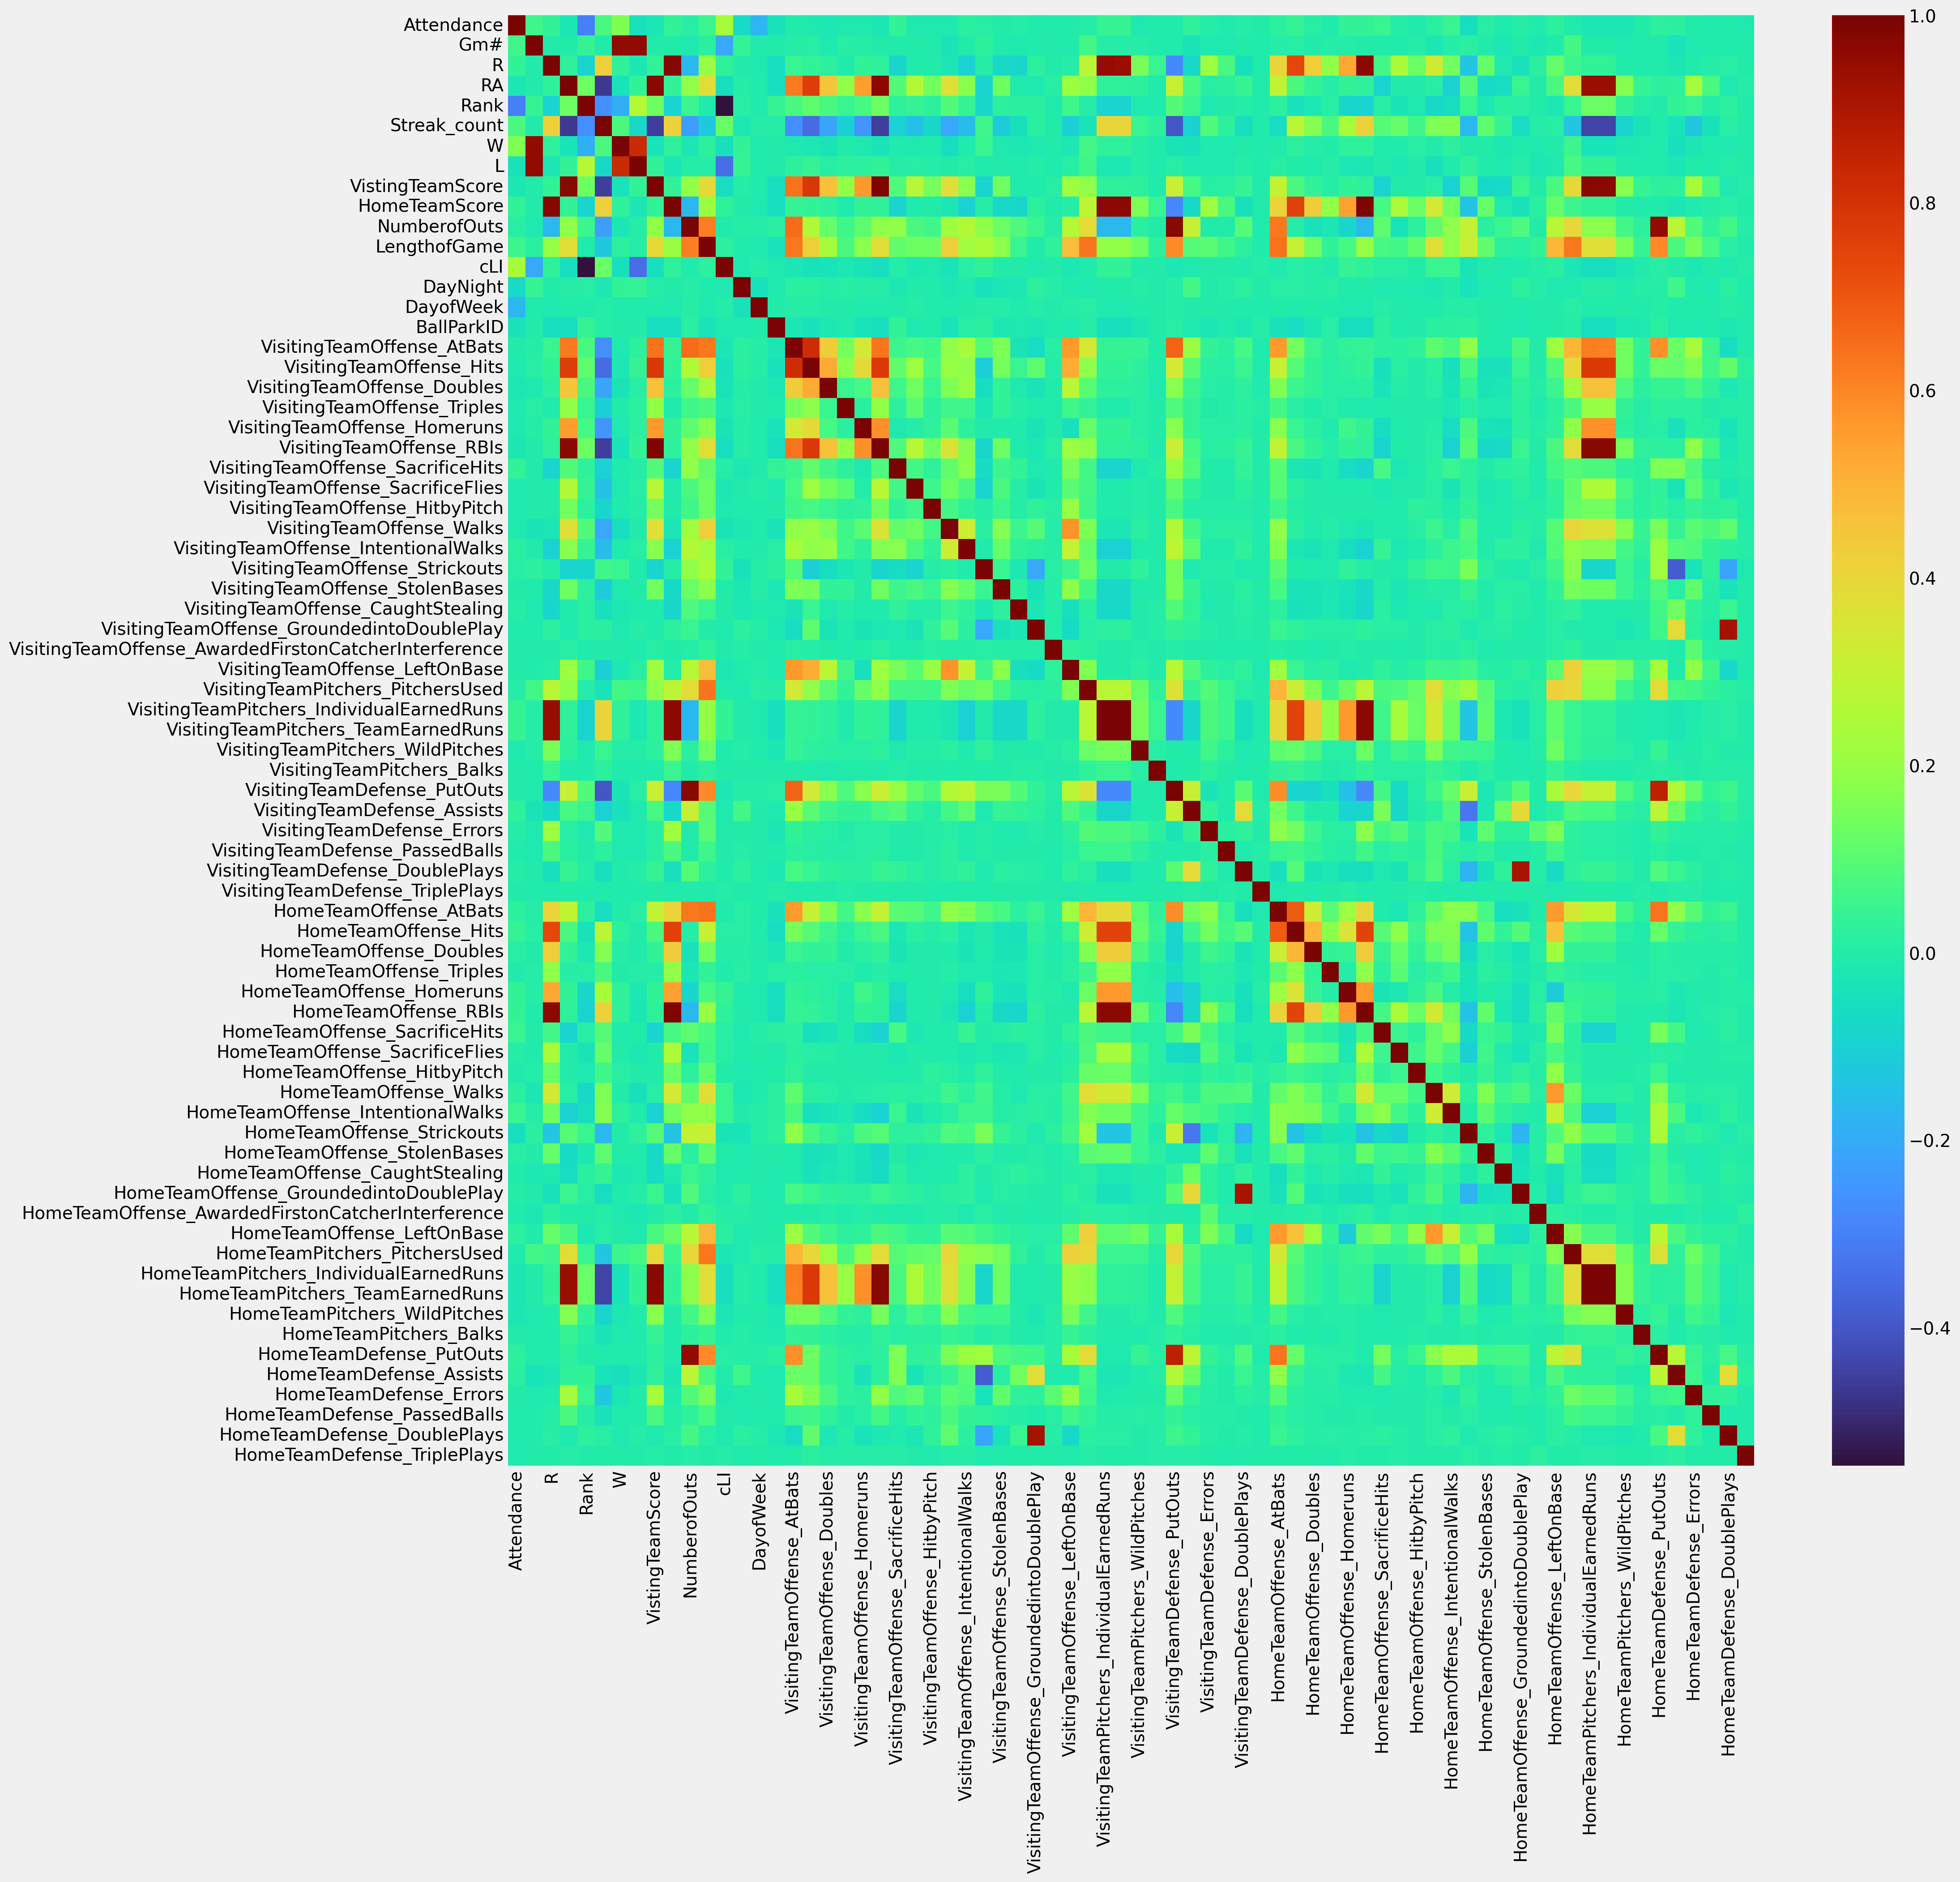

In [14]:
# pearson correlations
df_features = df[features]
corr = df_features.select_dtypes(['int', 'float']).corr(method='pearson')
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111)
sns.heatmap(corr, cmap='turbo', ax=ax)
# filter by top 20 strongest pearson correlations with attendance excluding attendance with itself
display(corr.loc[corr.index != 'Attendance', 'Attendance'].abs().sort_values(ascending=False).iloc[:20])

In [15]:
p_correlated_features = corr.loc[corr.index != 'Attendance', 'Attendance'] \
                          .abs().sort_values(ascending=False).iloc[:20].index.to_numpy()
p_correlated_features

array(['Rank', 'cLI', 'DayofWeek', 'W', 'Streak_count', 'DayNight', 'Gm#',
       'LengthofGame', 'HomeTeamOffense_Strickouts',
       'HomeTeamOffense_SacrificeHits',
       'HomeTeamOffense_IntentionalWalks', 'HomeTeamOffense_Hits', 'L',
       'BallParkID', 'VisitingTeamPitchers_IndividualEarnedRuns',
       'VisitingTeamPitchers_TeamEarnedRuns', 'HomeTeamOffense_RBIs',
       'VisitingTeamOffense_SacrificeHits', 'HomeTeamScore', 'R'],
      dtype=object)

<Axes: >

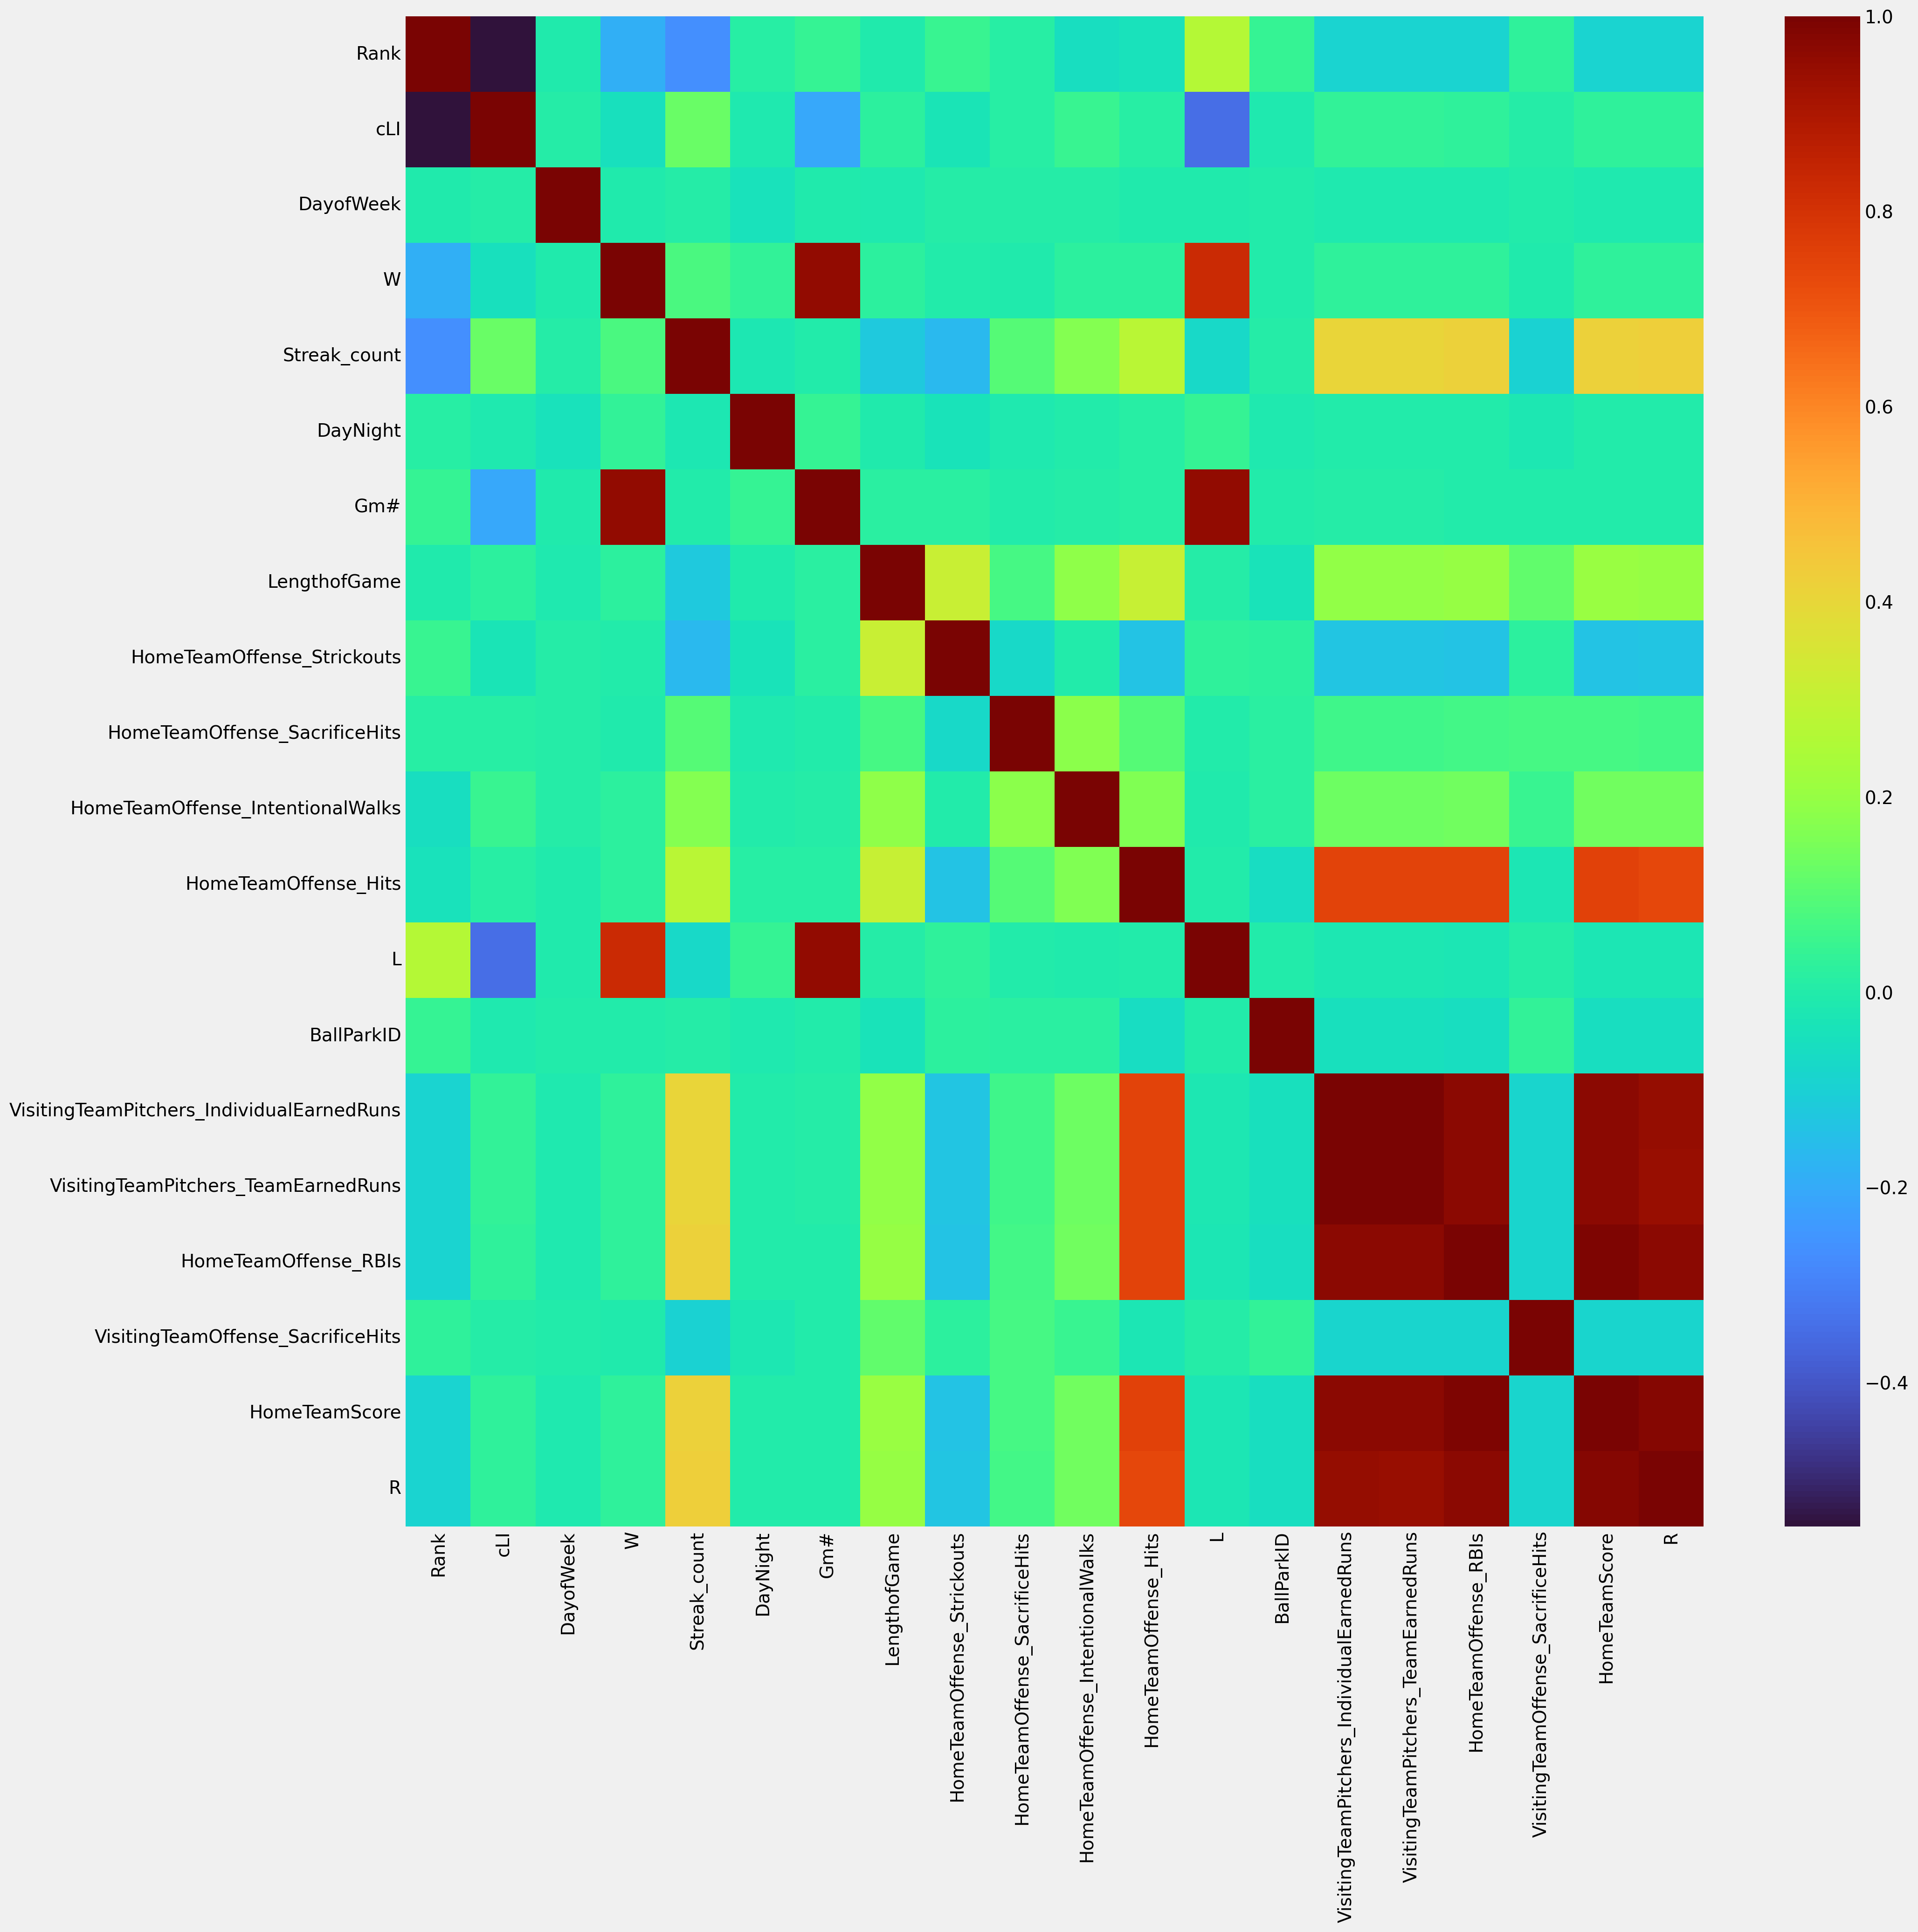

In [16]:
df_features = df[p_correlated_features]
corr = df_features.select_dtypes(['int', 'float']).corr(method='pearson')
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111)
sns.heatmap(corr, cmap='turbo', ax=ax)

Rank                                         0.312624
cLI                                          0.256078
DayofWeek                                    0.170259
W                                            0.157329
DayNight                                     0.080332
Streak_count                                 0.067716
Gm#                                          0.061438
LengthofGame                                 0.051513
HomeTeamOffense_Strickouts                   0.051213
BallParkID                                   0.050013
HomeTeamOffense_SacrificeHits                0.048427
HomeTeamOffense_IntentionalWalks             0.045707
VisitingTeamOffense_SacrificeHits            0.041176
HomeTeamOffense_Hits                         0.037471
VisitingTeamPitchers_IndividualEarnedRuns    0.034685
HomeTeamOffense_RBIs                         0.034287
VisitingTeamPitchers_TeamEarnedRuns          0.034259
HomeTeamScore                                0.032944
R                           

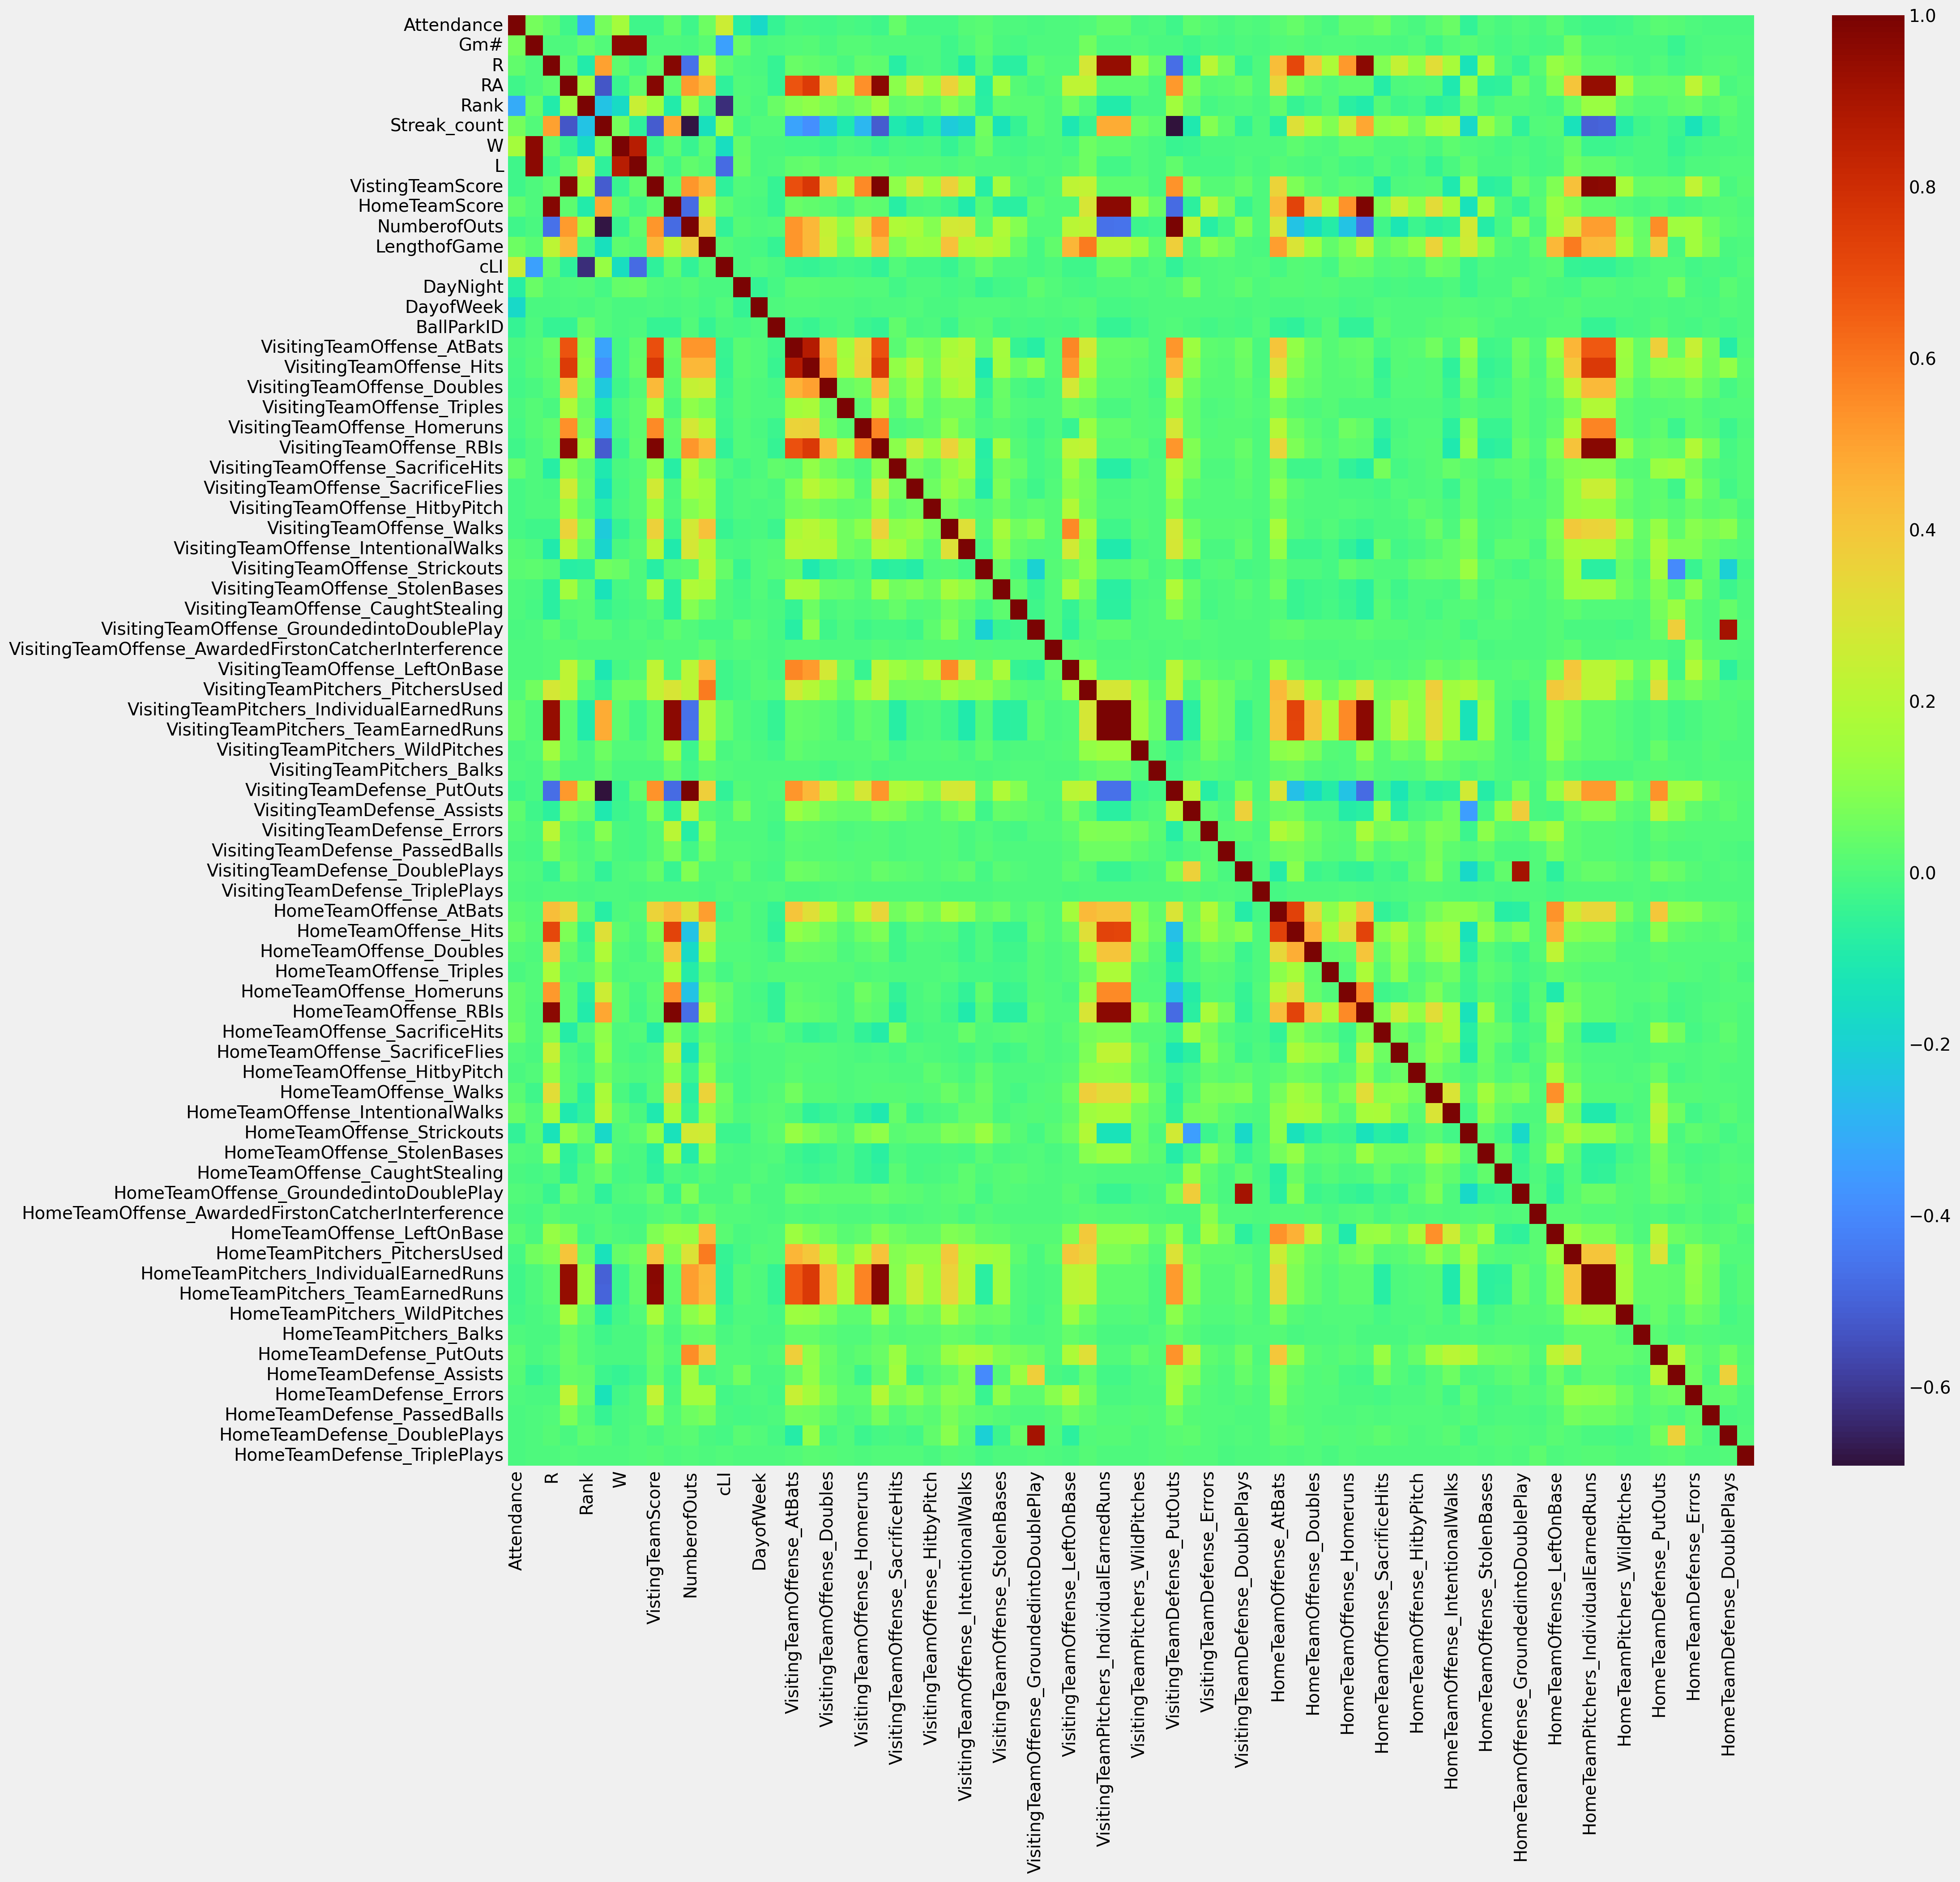

In [17]:
# spearman correlations - monotonic relationships
df_features = df[features]
corr = df_features.select_dtypes(['int', 'float']).corr(method='spearman')
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111)
sns.heatmap(corr, cmap='turbo', ax=ax)
# filter by top 20 strongest pearson correlations with attendance excluding attendance with itself
display(corr.loc[corr.index != 'Attendance', 'Attendance'].abs().sort_values(ascending=False).iloc[:20])

In [18]:
s_correlated_features = corr.loc[corr.index != 'Attendance', 'Attendance'] \
                          .abs().sort_values(ascending=False).iloc[:20].index.to_numpy()
s_correlated_features

array(['Rank', 'cLI', 'DayofWeek', 'W', 'DayNight', 'Streak_count', 'Gm#',
       'LengthofGame', 'HomeTeamOffense_Strickouts', 'BallParkID',
       'HomeTeamOffense_SacrificeHits',
       'HomeTeamOffense_IntentionalWalks',
       'VisitingTeamOffense_SacrificeHits', 'HomeTeamOffense_Hits',
       'VisitingTeamPitchers_IndividualEarnedRuns',
       'HomeTeamOffense_RBIs', 'VisitingTeamPitchers_TeamEarnedRuns',
       'HomeTeamScore', 'R', 'HomeTeamOffense_Homeruns'], dtype=object)

In [19]:
# find intersection of pearson and spearman correlations for linear regression features
p = set(p_correlated_features)
s = set(s_correlated_features)
features = list(p.intersection(s))
features.append('Attendance')
features = np.array(features)

In [20]:
features

array(['HomeTeamOffense_IntentionalWalks', 'HomeTeamOffense_Strickouts',
       'Rank', 'W', 'VisitingTeamPitchers_TeamEarnedRuns',
       'HomeTeamOffense_SacrificeHits', 'Gm#', 'LengthofGame',
       'VisitingTeamPitchers_IndividualEarnedRuns', 'cLI',
       'HomeTeamOffense_Hits', 'HomeTeamScore', 'BallParkID',
       'VisitingTeamOffense_SacrificeHits', 'R', 'DayofWeek', 'DayNight',
       'Streak_count', 'HomeTeamOffense_RBIs', 'Attendance'], dtype='<U41')